In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import itertools
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_vecvalue(run, name):
    """Returns an array containing the values of a given vector for the specified run."""
    
    try:
        return np.fromstring(df[(df.type == "vector") & (df.run == run) & (df.name == name)].iloc[0].vecvalue, 
                             sep=" ", dtype=np.double)
    except Exception:
        return np.array([])


def get_vectime(run, name):
    """Returns an array containing the time values of a given vector for the specified run."""
    
    try:
        return np.fromstring(df[(df.type == "vector") & (df.run == run) & (df.name == name)].iloc[0].vectime, 
                             sep=" ", dtype=np.double)
    except Exception:
        return np.array([])

In [3]:
def get_throughput(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'Throughput:vector')


def get_throughput_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'Throughput:vector')


def get_rt(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'ResponseTime:vector')


def get_rt_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'ResponseTime:vector')


def get_num_plane(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'numPlane:vector')


def get_num_plane_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'numPlane:vector')

In [4]:
def get_landing_queue(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'LandingQueueTime:vector')


def get_landing_queue_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'LandingQueueTime:vector')


def get_takeoff_queue(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'TakeoffQueueTime:vector')


def get_takeoff_queue_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'TakeoffQueueTime:vector')

Text(0, 0.5, 'Std. error across repetitions for mean response time')

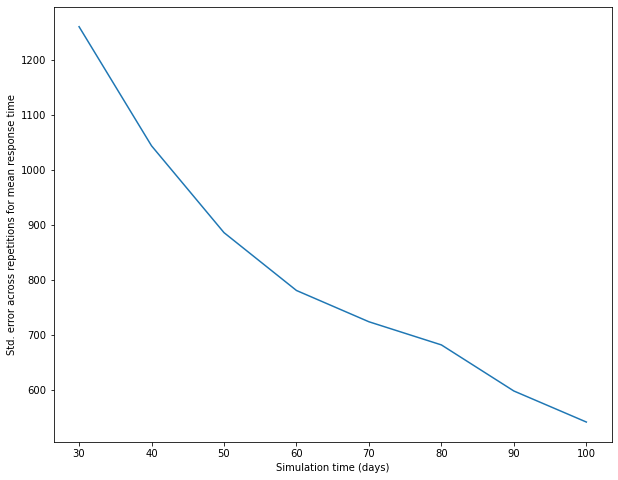

In [21]:
dataframes = {}
dataframes[30] = pd.read_csv('../results/control_tower_exponential_30.csv')
dataframes[40] = pd.read_csv('../results/control_tower_exponential_40.csv')
dataframes[50] = pd.read_csv('../results/control_tower_exponential_50.csv')
dataframes[60] = pd.read_csv('../results/control_tower_exponential_60.csv')
dataframes[70] = pd.read_csv('../results/control_tower_exponential_70.csv')
dataframes[80] = pd.read_csv('../results/control_tower_exponential_80.csv')
dataframes[90] = pd.read_csv('../results/control_tower_exponential_90.csv')
dataframes[100] = pd.read_csv('../results/control_tower_exponential_100.csv')

plt.figure(figsize=(10, 8))
sim_times = []
variances = []
for sim_time, df in dataframes.items():
    all_runs = df.run.unique()
    mean_rts = []
    for run in all_runs:
        mean_rts.append(np.mean(get_rt(run)))
    sim_times.append(sim_time)
    variances.append(st.sem(mean_rts))
    
x = np.array(sim_times, dtype=int)
y = np.array(variances, dtype=float)
plt.plot(x, y)
plt.xlabel("Simulation time (days)")
plt.ylabel("Std. error across repetitions for mean response time")

Text(0, 0.5, 'Std. error across repetitions for planes in parking area')

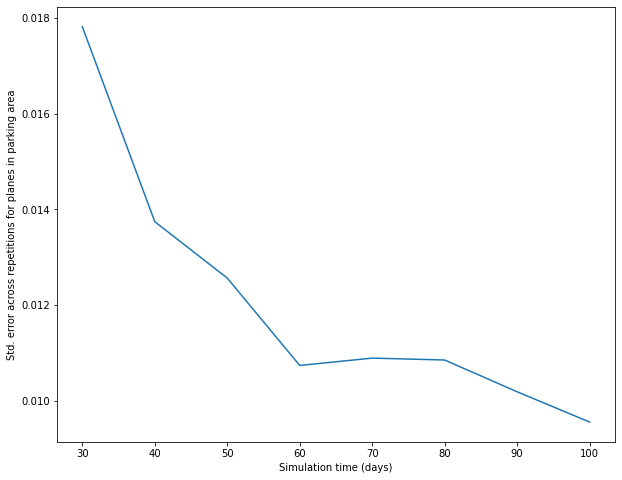

In [22]:
plt.figure(figsize=(10, 8))
sim_times = []
variances = []
for sim_time, df in dataframes.items():
    all_runs = df.run.unique()
    mean_rts = []
    for run in all_runs:
        mean_rts.append(np.mean(get_num_plane(run)))
    sim_times.append(sim_time)
    variances.append(st.sem(mean_rts))
    
x = np.array(sim_times, dtype=int)
y = np.array(variances, dtype=float)
plt.plot(x, y)
plt.xlabel("Simulation time (days)")
plt.ylabel("Std. error across repetitions for planes in parking area")

Text(0, 0.5, 'Std. error across repetitions for wait time in TQ')

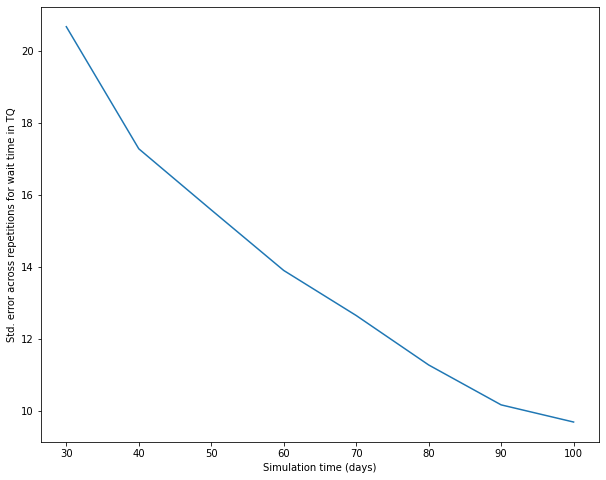

In [23]:
plt.figure(figsize=(10, 8))
sim_times = []
variances = []
for sim_time, df in dataframes.items():
    all_runs = df.run.unique()
    mean_rts = []
    for run in all_runs:
        mean_rts.append(np.mean(get_takeoff_queue(run)))
    sim_times.append(sim_time)
    variances.append(st.sem(mean_rts))
    
x = np.array(sim_times, dtype=int)
y = np.array(variances, dtype=float)
plt.plot(x, y)
plt.xlabel("Simulation time (days)")
plt.ylabel("Std. error across repetitions for wait time in TQ")